In [5]:
import pandas as pd
from pandas import DataFrame ,Series
import numpy as np

close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL','MSFT','XOM']]

close_px=close_px.resample('B',fill_method='ffill')

close_px

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


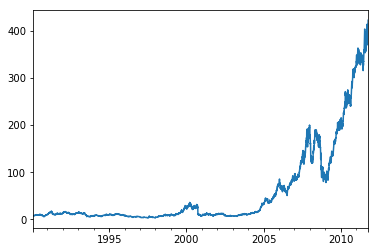

In [6]:
close_px['AAPL'].plot()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


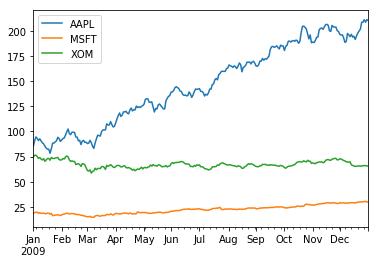

In [9]:
close_px.ix['2009'].plot()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


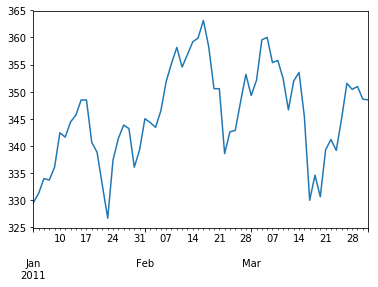

In [10]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


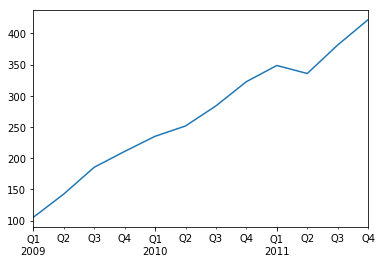

In [11]:
#季度型频率的数据会用季度标记进行格式化
appl_q = close_px['AAPL'].resample('Q-DEC',fill_method = 'ffill')
appl_q.ix['2009':].plot()

## 移动窗口函数
在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于时间序列的数组变换。其中还包括那些窗口不定长的函数（如指数加权移动平均）。跟其他统计函数一样，移动窗口函数也会自动排除缺失值。

　　rolling_mean 是其中最简单的一个。它接受一个 TimeSeries 或 DataFrame 以及一个 window（表示期数）：

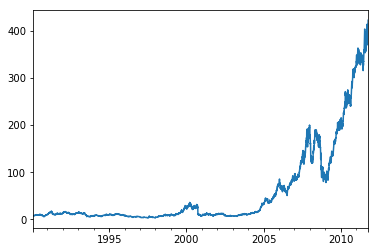

In [13]:
close_px.AAPL.plot()

如图所示，默认情况下，诸如 rolling_mean 这样的函数需要指定数量的非 NA 观测值。可以修改该行为以解决缺失数据的问题。其实，在时间序列开始处尚不足窗口期的那些数据就是个特列：



In [27]:
#appl_std250 = pd.rolling_std(close_px.AAPL,250,min_periods=10)


app1_std250 = close_px.AAPL.rolling(250,min_periods=10).std()

app1_std250[5:12]

1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    0.148189
1990-02-15    0.141003
1990-02-16    0.135454
Freq: B, Name: AAPL, dtype: float64

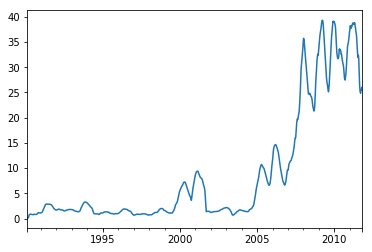

In [29]:
app1_std250.plot()

要计算扩展窗口平均（expanding window mean），我们可以将扩展窗口看做一个特殊的窗口，其长度与时间序列一样，但只需一期（或多期）即可计算一个值

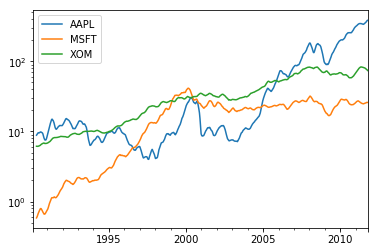

In [34]:
# 通过 rolling_mean 定义扩展平均
#moving_avg = ts_log.rolling(12).mean()

expanding_mean = lambda x: x.rolling(len(x),min_periods=1).mean()  

# 对 DataFrame 调用 rolling_mean 会将转换应用到所有的列

close_px.rolling(60).mean().plot(logy=True)

函数 |	说明
--|--
rolling_count	| 返回各窗口非 NA 观测值的数量
rolling_sum	| 移动窗口的和
rolling_mean	| 移动窗口的平均值
rolling_median	| 移动窗口的中位数
rolling_var、rolling_std	| 移动窗口的方差和标准差，分母为 n-1
rolling_skew、rolling_kurt	| 移动窗口的偏度（三阶矩）和峰度（四阶矩）
rolling_min、rolling_max	| 移动窗口的最小值和最大值
rolling_quantile	| 移动窗口指定百分位数/样本分位数位置的值
rolling_corr、rolling_cov	| 移动窗口的相关系数和协方差
rolling_apply	| 对移动窗口应用普通数组函数
ewma	| 指数加权移动平均
ewmvar、ewmstd	| 指数加权移动方差和标准差
ewmcorr、ewmcov	| 指数加权移动相关系数和协方差

　　另一种使用固定大小窗口及相等权数观测值的办法是，定义一个衰减因子（decay factor）常量，以便使近期的观测值拥有更大的权数。衰减因子的定义方式有很多，比较流行的是使用时间间隔（span），它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口（simple moving window）函数。

　　由于指数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，它能“适应”更快的变化。下面这个例子对比了苹果公司股价的60日移动平均和 span = 60 的指数加权移动平均：

Text(0.5, 1.0, 'Exponentially-weighted MA')

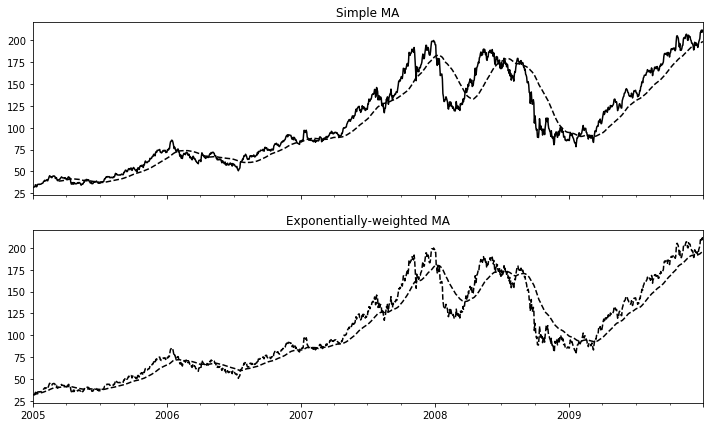

In [38]:
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(12,7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = aapl_px.rolling(60, min_periods=50).mean()

#ewma60 = pd.ewma(aapl_px, span=60)
ewma60= pd.DataFrame.ewm(aapl_px,span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])

ma60.plot(style='k--', ax=axes[0])

aapl_px.plot(style='k--', ax=axes[1])

ewma60.plot(style='k--', ax=axes[1])

axes[0].set_title('Simple MA')

axes[1].set_title('Exponentially-weighted MA')
